# Создаём гифки

### 1. Закон больших чисел

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


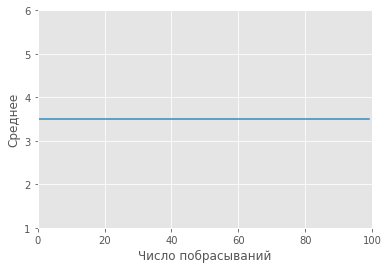

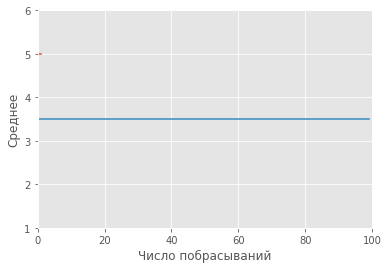

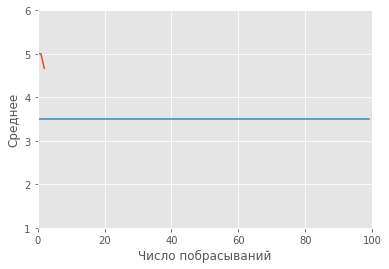

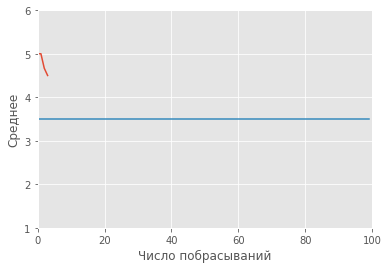

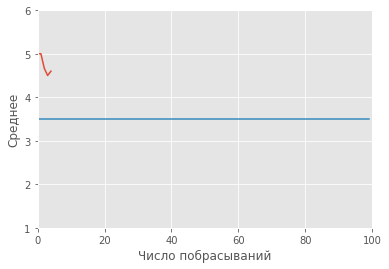

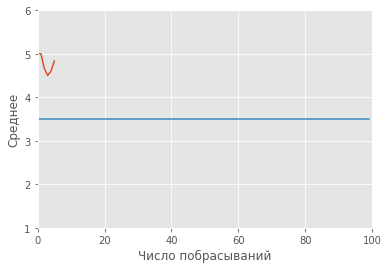

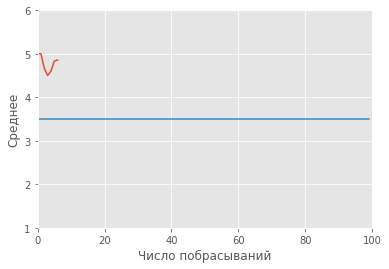

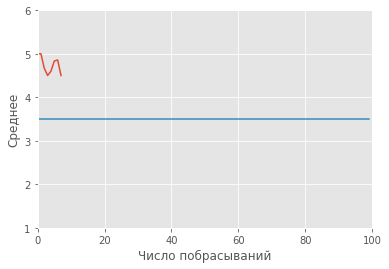

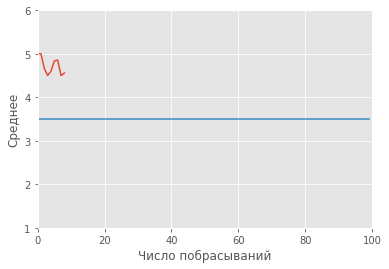

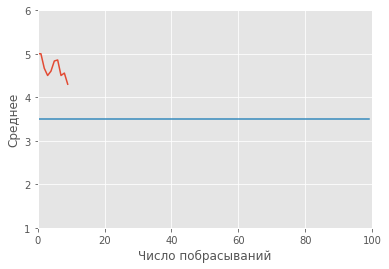

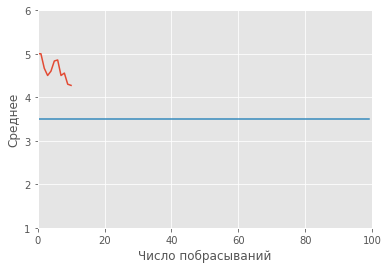

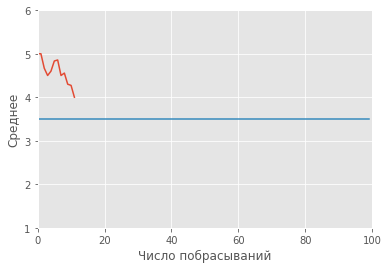

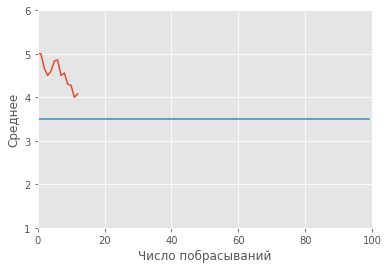

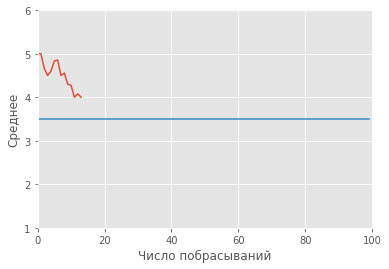

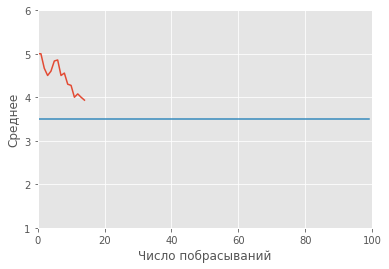

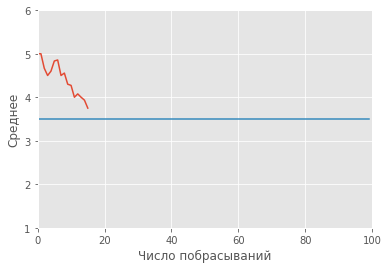

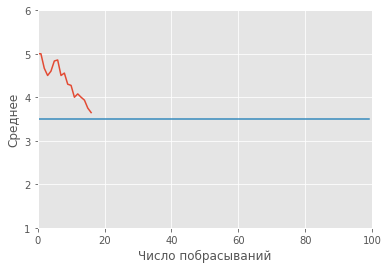

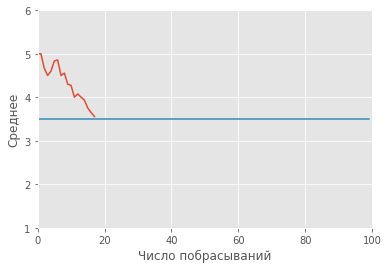

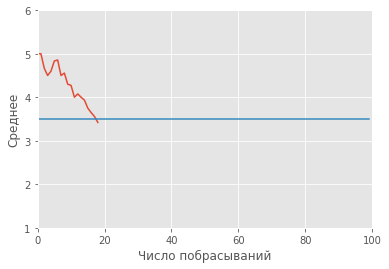

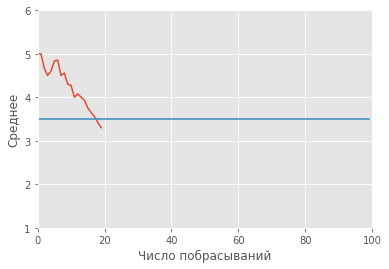

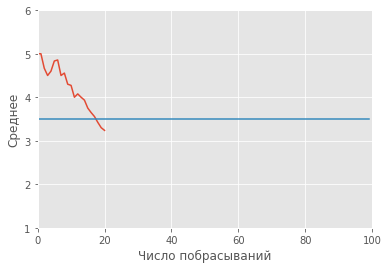

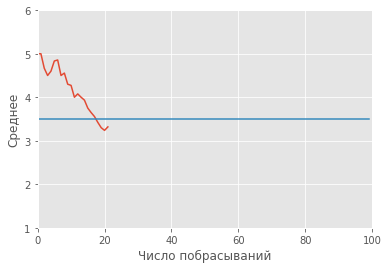

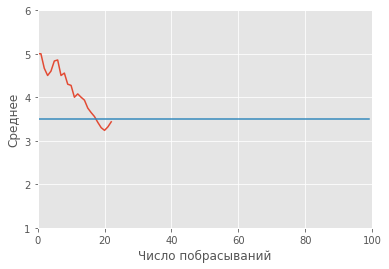

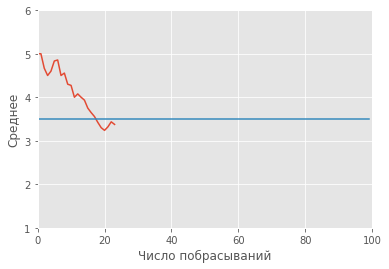

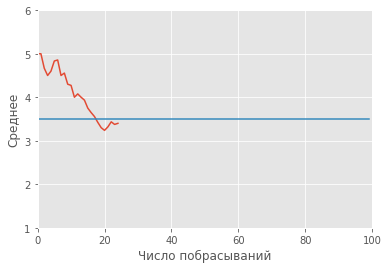

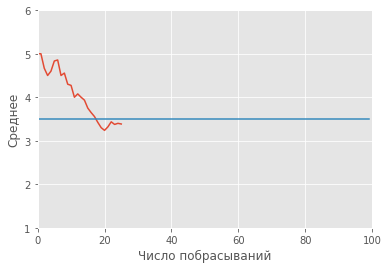

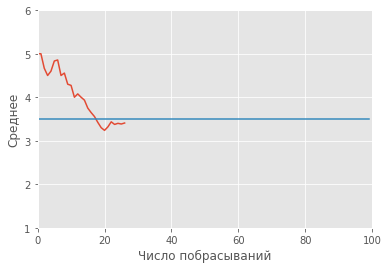

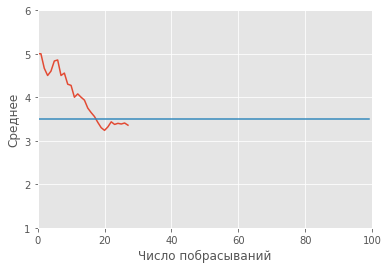

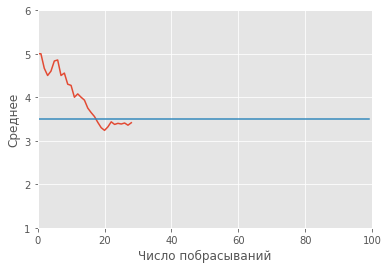

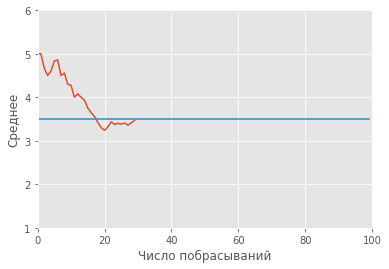

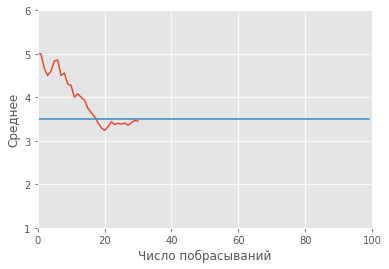

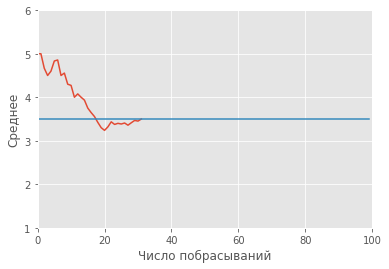

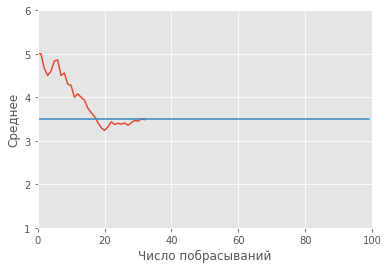

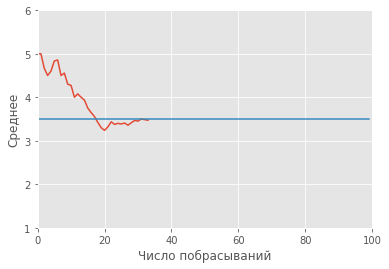

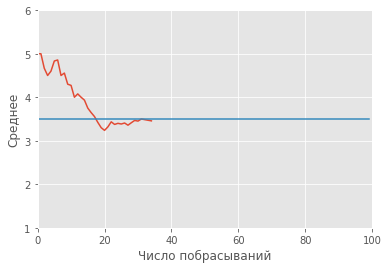

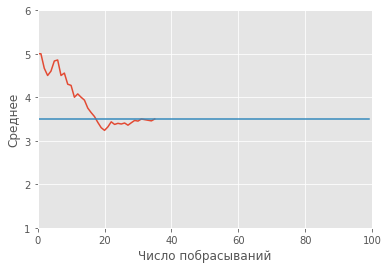

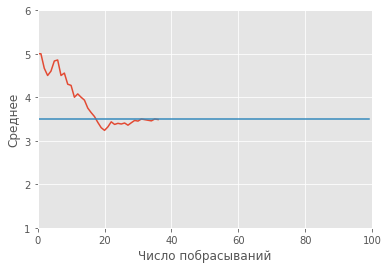

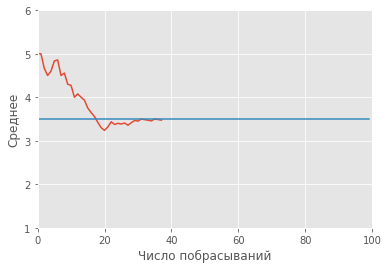

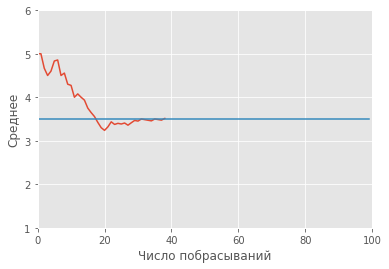

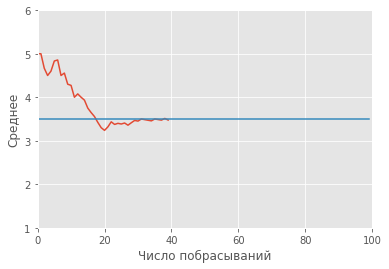

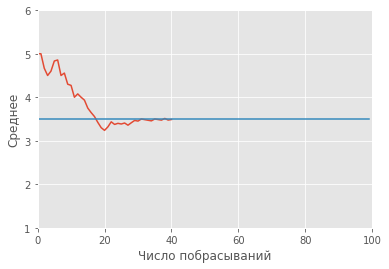

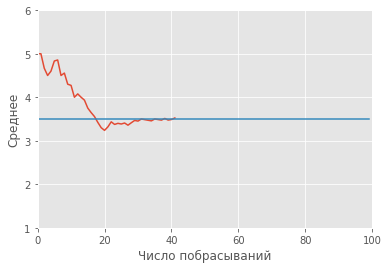

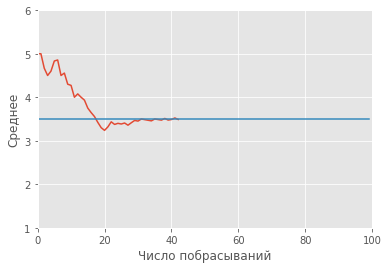

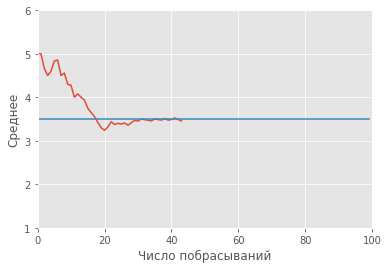

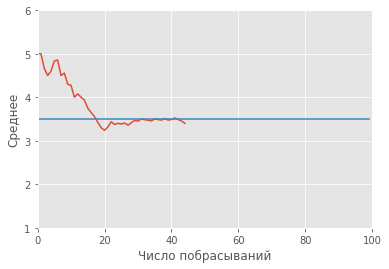

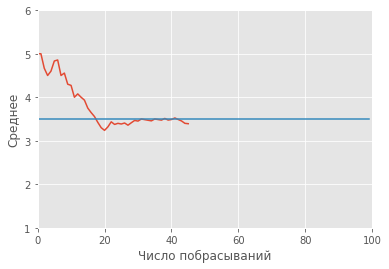

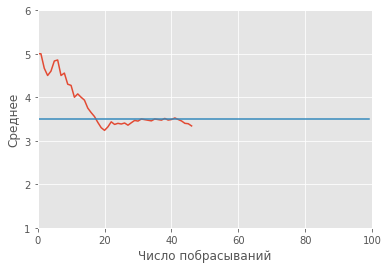

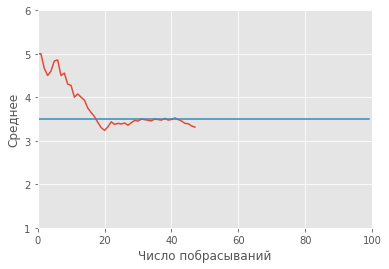

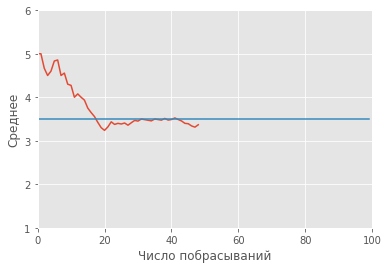

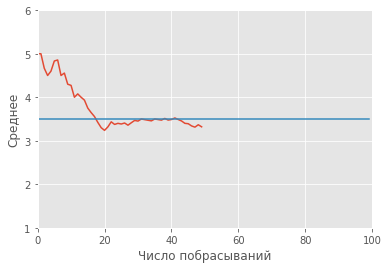

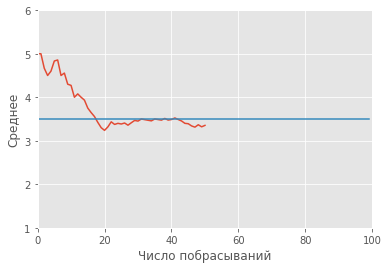

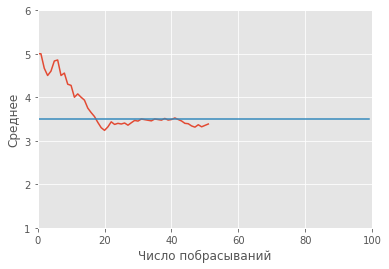

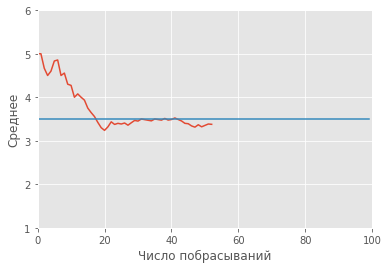

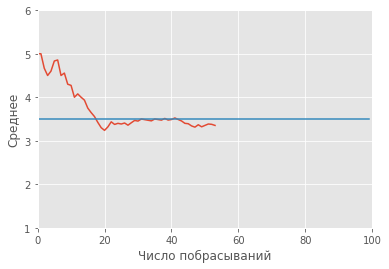

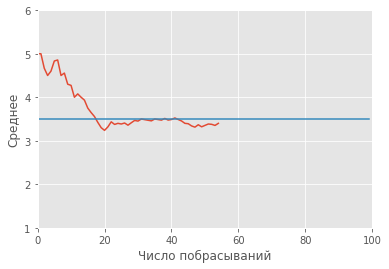

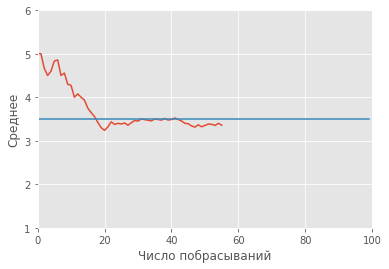

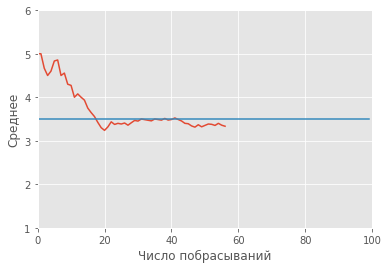

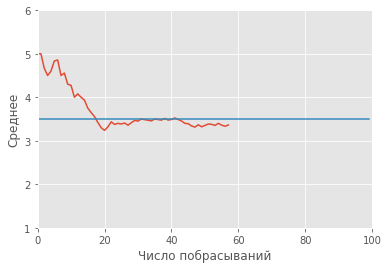

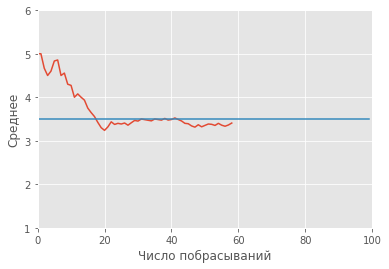

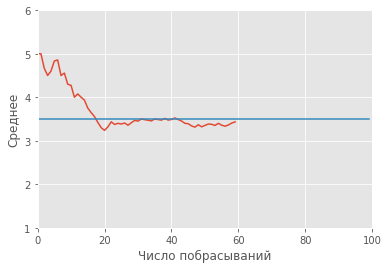

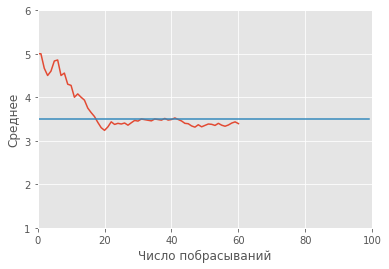

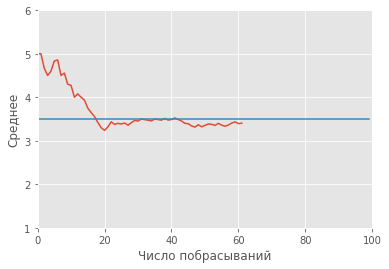

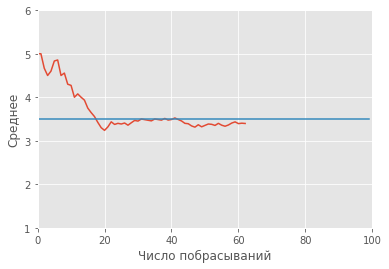

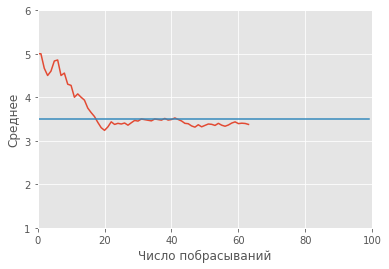

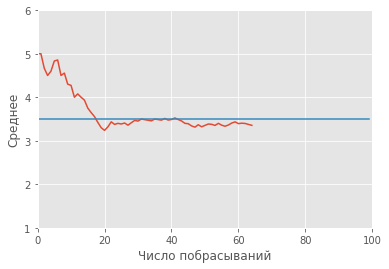

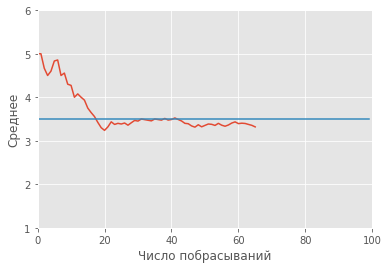

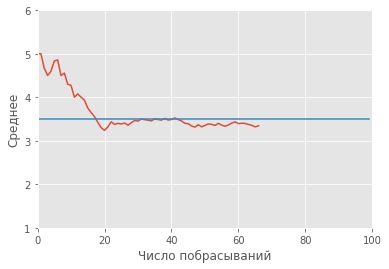

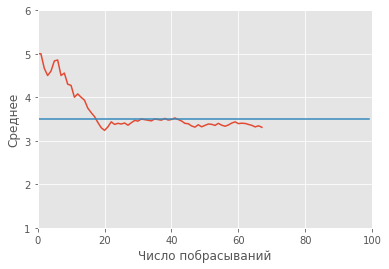

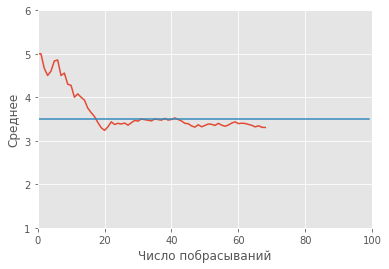

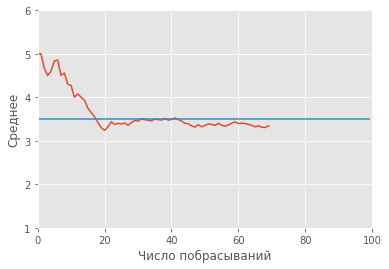

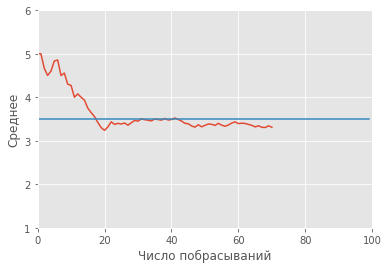

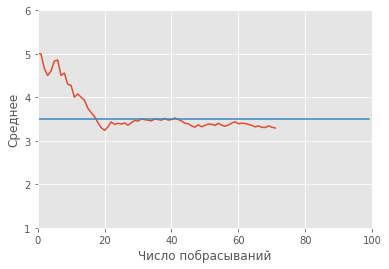

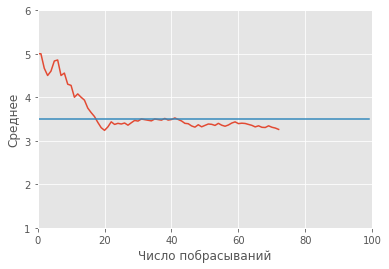

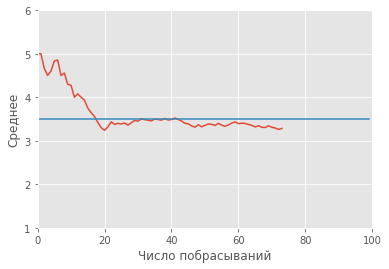

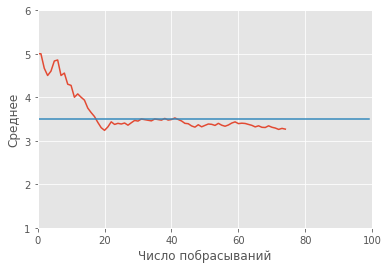

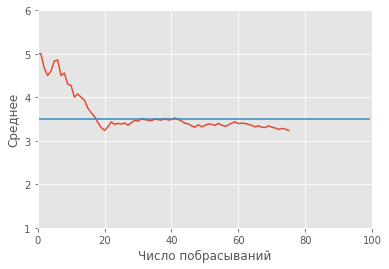

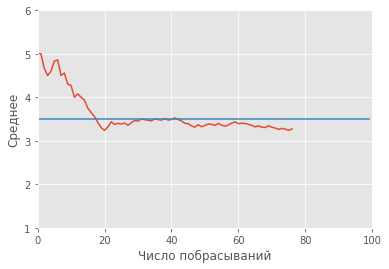

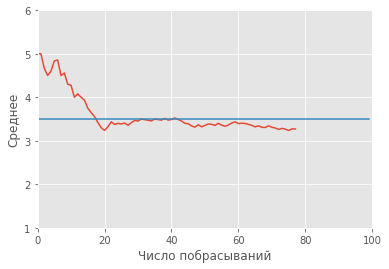

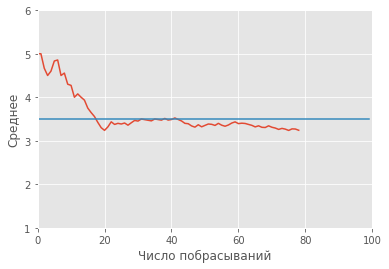

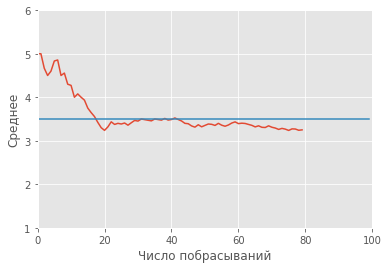

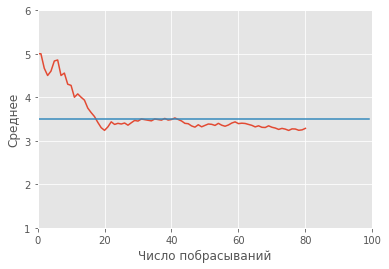

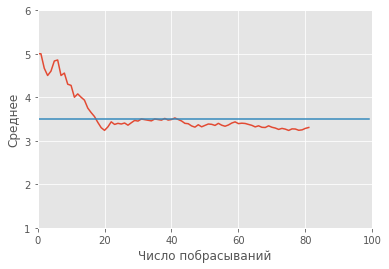

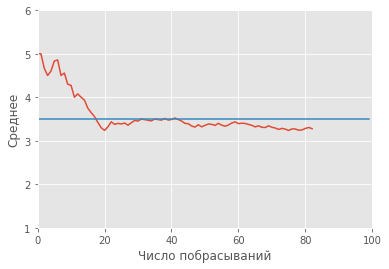

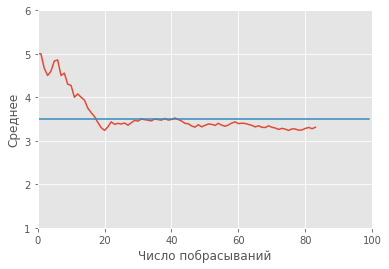

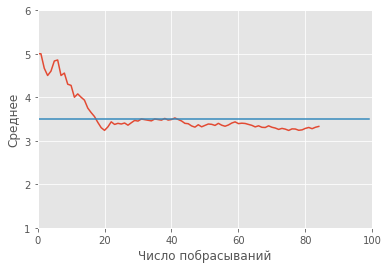

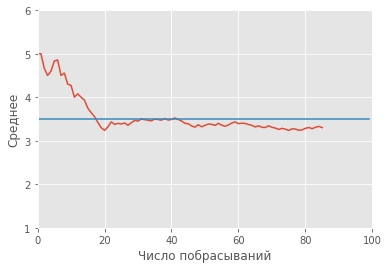

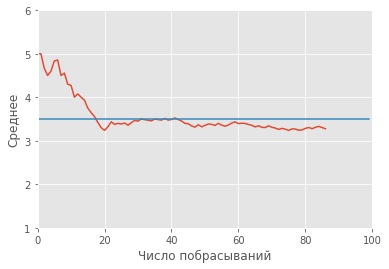

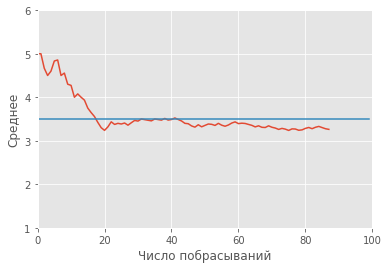

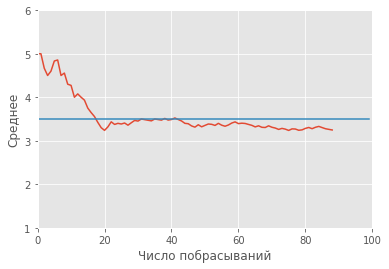

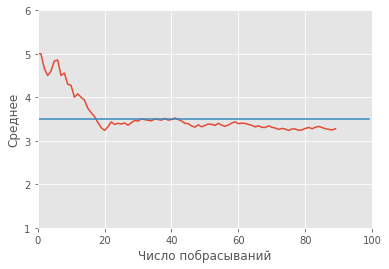

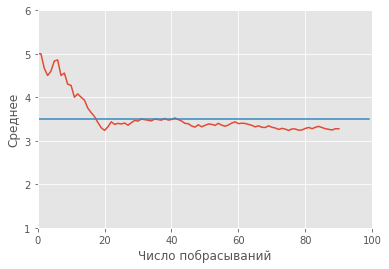

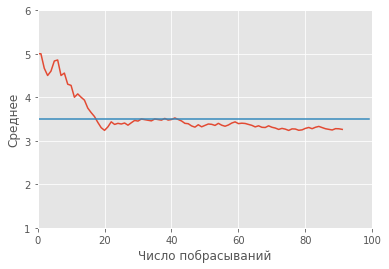

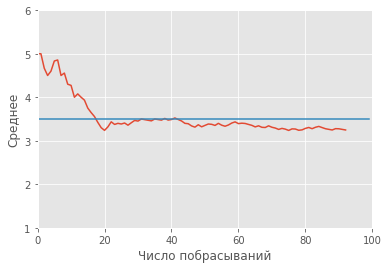

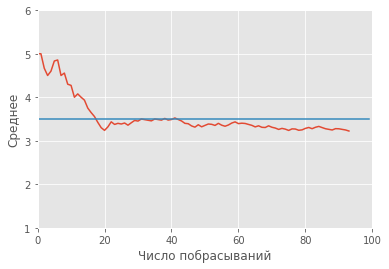

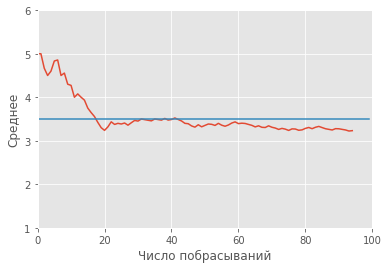

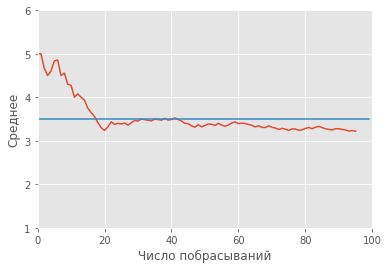

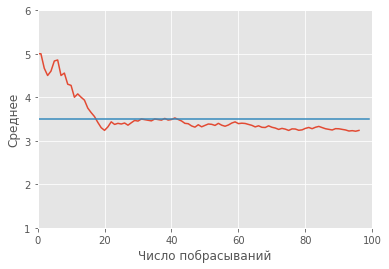

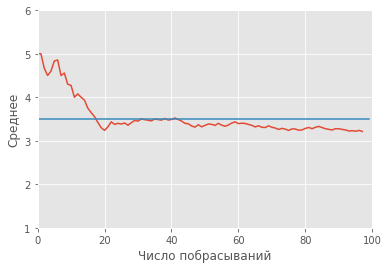

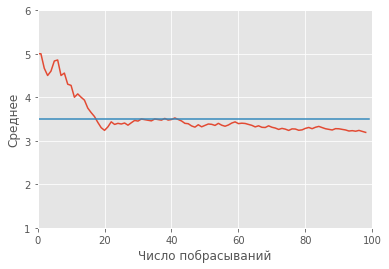

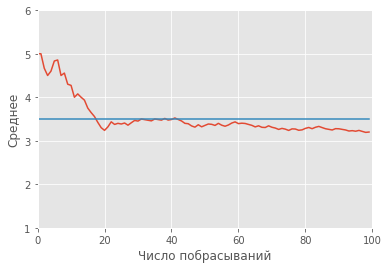

In [101]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')   # Правильный стиль графиков 

images = 'images/'

x = [ ]
y = [ ]
s = 0

for i in range(100):
    x.append(i)
    s += np.random.choice([1,2,3,4,5,6])
    y.append(s/len(x))
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Число побрасываний')
    ax.set_ylabel('Среднее')
    ax.set_ylim(1,6)
    ax.set_xlim(0,100)

    ax.plot(x, y)
    ax.plot(list(range(100)),[3.5]*100)
    
    fig.savefig('images/{}.png'.format(i), dpi=80)
    

In [102]:
import os
import glob
import imageio

pause = 1
animated_gif_name = 'animation_LLN.gif'

def create_animated_gif(files, animated_gif_name, pause=0):
    if pause != 0:
        # Load the gifs up several times in the array, to slow down the animation
        frames = []
        for file in files:
            count = 0
            while count < pause:
                frames.append(file)
                count+=1
        print("Total number of frames in the animation:", len(frames))
        files = frames
    images = [imageio.imread(file) for file in files]
    imageio.mimsave(animated_gif_name, images, duration = 0.005)

In [103]:
image_path = 'images/*.png'
files = glob.glob(image_path)
files = sorted(files, key = lambda w: int(w.split('/')[-1].split('.')[0]))
create_animated_gif(files, animated_gif_name, pause)

Total number of frames in the animation: 100


![](animation_LLN.gif)

In [93]:
for f in glob.glob("images/*.png"):
    os.remove(f)